In [1]:
import numpy as np
from braindecode.datasets import MOABBDataset

subject_id = [1,2,3,4]
dataset = MOABBDataset(dataset_name="BNCI2014_001", subject_ids=[1,2,3,4,5,6,7,8,9])



from braindecode.preprocessing import (
    exponential_moving_standardize,
    preprocess,
    Preprocessor,
)


low_cut_hz = 4.0  # low cut frequency for filtering
high_cut_hz = 38.0  # high cut frequency for filtering
# Parameters for exponential moving standardization
factor_new = 1e-3
init_block_size = 1000

transforms = [
    Preprocessor("pick_types", eeg=True, meg=False, stim=False),  # Keep EEG sensors
    Preprocessor(
        lambda data, factor: np.multiply(data, factor),  # Convert from V to uV
        factor=1e6,
    ),
    Preprocessor("filter", l_freq=low_cut_hz, h_freq=high_cut_hz),  # Bandpass filter
    Preprocessor(
        exponential_moving_standardize,  # Exponential moving standardization
        factor_new=factor_new,
        init_block_size=init_block_size,
    ),
]

# Transform the data
preprocess(dataset, transforms, n_jobs=-1)


C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\torch_geometric\typing.py:86: UserWarning: An issue occurred while importing 'torch-scatter'. Disabling its usage. Stacktrace: [WinError 127] The specified procedure could not be found
  warnings.warn(f"An issue occurred while importing 'torch-scatter'. "
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\torch_geometric\typing.py:97: UserWarning: An issue occurred while importing 'torch-cluster'. Disabling its usage. Stacktrace: [WinError 127] The specified procedure could not be found
  warnings.warn(f"An issue occurred while importing 'torch-cluster'. "
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\torch_geometric\typing.py:113: UserWarning: An issue occurred while import

In [2]:
from braindecode.preprocessing import create_windows_from_events

trial_start_offset_seconds = -0.5
# Extract sampling frequency, check that they are same in all datasets
sfreq = dataset.datasets[0].raw.info["sfreq"]
assert all([ds.raw.info["sfreq"] == sfreq for ds in dataset.datasets])
# Calculate the trial start offset in samples.
trial_start_offset_samples = int(trial_start_offset_seconds * sfreq)

# Create windows using braindecode function for this. It needs parameters to define how
# trials should be used.
windows_dataset = create_windows_from_events(
    dataset,
    trial_start_offset_samples=trial_start_offset_samples,
    trial_stop_offset_samples=0,
    preload=True,
)

Used Annotations descriptions: ['feet', 'left_hand', 'right_hand', 'tongue']
Used Annotations descriptions: ['feet', 'left_hand', 'right_hand', 'tongue']
Used Annotations descriptions: ['feet', 'left_hand', 'right_hand', 'tongue']
Used Annotations descriptions: ['feet', 'left_hand', 'right_hand', 'tongue']
Used Annotations descriptions: ['feet', 'left_hand', 'right_hand', 'tongue']
Used Annotations descriptions: ['feet', 'left_hand', 'right_hand', 'tongue']
Used Annotations descriptions: ['feet', 'left_hand', 'right_hand', 'tongue']
Used Annotations descriptions: ['feet', 'left_hand', 'right_hand', 'tongue']
Used Annotations descriptions: ['feet', 'left_hand', 'right_hand', 'tongue']
Used Annotations descriptions: ['feet', 'left_hand', 'right_hand', 'tongue']
Used Annotations descriptions: ['feet', 'left_hand', 'right_hand', 'tongue']
Used Annotations descriptions: ['feet', 'left_hand', 'right_hand', 'tongue']


Used Annotations descriptions: ['feet', 'left_hand', 'right_hand', 'tongue']
Used Annotations descriptions: ['feet', 'left_hand', 'right_hand', 'tongue']
Used Annotations descriptions: ['feet', 'left_hand', 'right_hand', 'tongue']
Used Annotations descriptions: ['feet', 'left_hand', 'right_hand', 'tongue']
Used Annotations descriptions: ['feet', 'left_hand', 'right_hand', 'tongue']
Used Annotations descriptions: ['feet', 'left_hand', 'right_hand', 'tongue']
Used Annotations descriptions: ['feet', 'left_hand', 'right_hand', 'tongue']
Used Annotations descriptions: ['feet', 'left_hand', 'right_hand', 'tongue']
Used Annotations descriptions: ['feet', 'left_hand', 'right_hand', 'tongue']
Used Annotations descriptions: ['feet', 'left_hand', 'right_hand', 'tongue']
Used Annotations descriptions: ['feet', 'left_hand', 'right_hand', 'tongue']
Used Annotations descriptions: ['feet', 'left_hand', 'right_hand', 'tongue']
Used Annotations descriptions: ['feet', 'left_hand', 'right_hand', 'tongue']

In [3]:
import torch
from shallow_fbcsp import ShallowFBCSPNet
from braindecode.util import set_random_seeds


cuda = torch.cuda.is_available()  # check if GPU is available, if True chooses to use it
device = "cuda" if cuda else "cpu"
if cuda:
    torch.backends.cudnn.benchmark = True
seed = 20200222
set_random_seeds(seed=seed, cuda=cuda)

n_classes = 4
classes = list(range(n_classes))
# Extract number of chans and time steps from dataset
n_channels = windows_dataset[0][0].shape[0]
input_window_samples = windows_dataset[0][0].shape[1]

print("n_classes: ", n_classes)
print("n_channels:", n_channels)
print("input_window_samples size:", input_window_samples)

n_classes:  4
n_channels: 22
input_window_samples size: 1125


C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\braindecode\util.py:51: UserWarning: torch.backends.cudnn.benchmark was set to True which may results in lack of reproducibility. In some cases to ensure reproducibility you may need to set torch.backends.cudnn.benchmark to False.
  warn(


In [4]:
#windows_dataset[0][0].shape

In [5]:
#!dir collapsed_shallow_fbscp

In [4]:
splitted = windows_dataset.split("session")
train_set = splitted['0train']  # Session train
test_set = splitted['1test']  # Session evaluation

from torch.nn import Module
from torch.optim.lr_scheduler import LRScheduler
from torch.utils.data import DataLoader

#lr = 1e-4
#weight_decay = 1e-4
#batch_size = 64
#n_epochs = 200


In [7]:
#train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True)
#progress_bar = tqdm(enumerate(train_loader), total=len(train_loader))


#from collections import defaultdict

#counting_dict = defaultdict(int)  # Initialize class counter

#for batch_idx, (X, y, _) in progress_bar:
#   X, y = X.to(device), y.to(device)  # Move to device if needed
    
    # Count occurrences of each class in y
#    for value in y:
#        counting_dict[int(value.item())] += 1  # Convert tensor to int and update count

# Print class frequencies
#print("Class counts:", dict(counting_dict))


In [5]:

from tqdm import tqdm
# Define a method for training one epoch


def train_one_epoch(
        dataloader: DataLoader, model: Module, loss_fn, optimizer,
        scheduler: LRScheduler, epoch: int, device, print_batch_stats=True
):
    model.train()  # Set the model to training mode
    train_loss, correct = 0, 0

    progress_bar = tqdm(enumerate(dataloader), total=len(dataloader),
                        disable=not print_batch_stats)

    for batch_idx, (X, y, _) in progress_bar:
        X, y = X.to(device), y.to(device)
        #print(X.shape)
        optimizer.zero_grad()
        pred = model(X)
        loss = loss_fn(pred, y)
        loss.backward()
        optimizer.step()  # update the model weights
        optimizer.zero_grad()

        train_loss += loss.item()
        correct += (pred.argmax(1) == y).sum().item()

        #if print_batch_stats:
        #    progress_bar.set_description(
        #        f"Epoch {epoch}/{n_epochs}, "
        #        f"Batch {batch_idx + 1}/{len(dataloader)}, "
        #        f"Loss: {loss.item():.6f}"
        #    )

    # Update the learning rate
    scheduler.step()

    correct /= len(dataloader.dataset)
    return train_loss / len(dataloader), correct


In [ ]:
from collections import defaultdict
from tqdm import tqdm
import torch
from torch.utils.data import DataLoader
from sklearn.metrics import confusion_matrix
import numpy as np

@torch.no_grad()
def test_model(dataloader: DataLoader, model: torch.nn.Module, loss_fn, print_batch_stats=True):
    device = next(model.parameters()).device  # Get model device
    size = len(dataloader.dataset)
    n_batches = len(dataloader)
    model.eval()  # Switch to evaluation mode
    test_loss, correct = 0, 0

    # Initialize dictionaries for per-class tracking
    class_correct = defaultdict(int)
    class_total = defaultdict(int)

    # Lists to store true and predicted labels for confusion matrix
    all_preds = []
    all_targets = []

    if print_batch_stats:
        progress_bar = tqdm(enumerate(dataloader), total=len(dataloader))
    else:
        progress_bar = enumerate(dataloader)

    for batch_idx, (X, y, _) in progress_bar:
        X, y = X.to(device), y.to(device)
        pred = model(X)
        batch_loss = loss_fn(pred, y).item()

        test_loss += batch_loss
        correct += (pred.argmax(1) == y).sum().item()

        # Store predictions and true labels for confusion matrix
        all_preds.append(pred.argmax(1).cpu())
        all_targets.append(y.cpu())

        # Compute per-class accuracy
        preds_labels = pred.argmax(1)
        for label, pred_label in zip(y, preds_labels):
            class_total[label.item()] += 1
            class_correct[label.item()] += (label == pred_label).item()

        if print_batch_stats:
            progress_bar.set_description(
                f"Batch {batch_idx + 1}/{len(dataloader)}, Loss: {batch_loss:.6f}"
            )

    # Convert lists to tensors
    all_preds = torch.cat(all_preds)
    all_targets = torch.cat(all_targets)

    # Compute per-class accuracy
    class_accuracies = {
        cls: (class_correct[cls] / class_total[cls]) * 100 if class_total[cls] > 0 else 0
        for cls in class_total
    }

    # Compute overall accuracy
    test_loss /= n_batches
    overall_accuracy = (correct / size) * 100

    # Print per-class accuracy
    print("\nClass-wise Accuracy:")
    for cls, acc in class_accuracies.items():
        print(f"  Class {cls}: {acc:.2f}%")

    print(f"Test Accuracy: {overall_accuracy:.1f}%, Test Loss: {test_loss:.6f}\n")

    return test_loss, overall_accuracy, class_accuracies, all_preds, all_targets


In [7]:
from braindecode.models import ShallowFBCSPNet 

In [11]:
#from torcheeg.io.eeg_signal import EEGSignalIO
#import pandas as pd
## Path to dir with data (remember the last '/')
#path = "/eeg_data/BNCI2014-001/"

## Establish connection to datafile
#IO = EEGSignalIO(io_path=str(path), io_mode='lmdb')

## Read metadata dataframe
#metadata = pd.read_csv(path + 'sample_metadata.tsv', sep='\t')

#idxs = np.arange(len(metadata))

#eeg = torch.FloatTensor(np.array([IO.read_eeg(str(i)) for i in idxs]))
#print(eeg.shape)

In [8]:
#!pip install torch_geometric
train_loader = DataLoader(train_set)
print(train_loader)
count = 0
for i in train_set:
    #print(len(i[0]))
    count +=1 
print(count)

2592


In [9]:
#import torch_spline_conv
#print(torch_spline_conv.__version__)


In [14]:
#!pip install torch-spline-conv 

#--no-cache-dir


In [ ]:
#!pip uninstall torch-scatter torch-cluster torch-spline-conv torch-sparse torch-geometric


In [9]:
import torch
print(torch.__version__)
print(torch.version.cuda)  # Check CUDA version


2.5.1+cu121
12.1


In [178]:
#!pip install cdt

In [14]:
import pandas as pd

try_df = pd.DataFrame(train_set[0][0])
try_df.T

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,0.850430,1.056113,0.842110,1.087390,0.959648,1.089768,1.103981,0.955000,0.761436,1.041354,...,1.770330,0.891527,0.735478,1.099481,1.316841,1.694953,0.993806,1.209127,1.442129,1.037865
1,0.294581,0.439647,0.189230,0.406684,0.244634,0.375009,0.491565,0.303164,0.027583,0.354375,...,0.969181,0.276782,0.001819,0.393677,0.506753,0.855842,0.267029,0.423273,0.626966,0.281974
2,-0.471326,-0.445746,-0.645384,-0.521189,-0.631680,-0.552234,-0.147965,-0.474150,-0.768023,-0.505870,...,0.014086,-0.345255,-0.694154,-0.386514,-0.347410,-0.052991,-0.350434,-0.303512,-0.188025,-0.336447
3,-1.022602,-1.132877,-1.224504,-1.218594,-1.181311,-1.159251,-0.486340,-0.980335,-1.216411,-1.104213,...,-0.556784,-0.668036,-1.000663,-0.850810,-0.838454,-0.607709,-0.580326,-0.653142,-0.644273,-0.602258
4,-1.052881,-1.243145,-1.240299,-1.337956,-1.114559,-1.122809,-0.367351,-0.963213,-1.104160,-1.158343,...,-0.492673,-0.569039,-0.800403,-0.805577,-0.783639,-0.620813,-0.393501,-0.548378,-0.612945,-0.513742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1120,0.182680,0.744059,0.412753,0.531231,0.347108,0.550915,0.395663,0.839441,0.815684,1.148189,...,0.412921,0.856989,1.043491,1.513772,1.228683,0.958398,0.929052,1.221563,1.150324,0.791412
1121,-0.276187,0.249983,-0.146560,-0.003303,-0.175968,0.101371,-0.121529,0.299144,0.139759,0.466857,...,-0.107138,0.358912,0.358741,0.841778,0.573304,0.392420,0.554360,0.779534,0.702855,0.681286
1122,-0.626695,-0.330911,-0.672026,-0.540045,-0.499026,-0.124514,-0.463143,-0.322533,-0.516428,-0.305350,...,-0.287496,-0.259364,-0.324866,0.027962,-0.093774,-0.119234,0.005845,0.122045,0.054521,0.213791
1123,-0.753754,-0.776437,-1.003108,-0.876184,-0.578985,-0.112043,-0.589476,-0.816335,-0.985218,-0.893069,...,-0.187967,-0.802115,-0.863552,-0.688590,-0.600554,-0.444984,-0.575012,-0.568792,-0.577882,-0.424400


In [15]:
for count, sample in enumerate(train_set):
    #print(f"Processing sample {count+1}/{len(train_set)}")
    node_features = pd.DataFrame(sample[0]).T.values  
    print(node_features.shape)
    break

(1125, 22)


Processing sample 1/2592
Processing sample 2/2592
Processing sample 3/2592
Processing sample 4/2592
Processing sample 5/2592
Processing sample 6/2592
Processing sample 7/2592
Processing sample 8/2592
Processing sample 9/2592
Processing sample 10/2592
Processing sample 11/2592
Processing sample 12/2592
Processing sample 13/2592
Processing sample 14/2592
Processing sample 15/2592
Processing sample 16/2592
Processing sample 17/2592
Processing sample 18/2592
Processing sample 19/2592
Processing sample 20/2592
Processing sample 21/2592
Processing sample 22/2592
Processing sample 23/2592
Processing sample 24/2592
Processing sample 25/2592
Processing sample 26/2592
Processing sample 27/2592
Processing sample 28/2592
Processing sample 29/2592
Processing sample 30/2592
Processing sample 31/2592
Processing sample 32/2592
Processing sample 33/2592
Processing sample 34/2592
Processing sample 35/2592
Processing sample 36/2592
Processing sample 37/2592
Processing sample 38/2592
Processing sample 39/

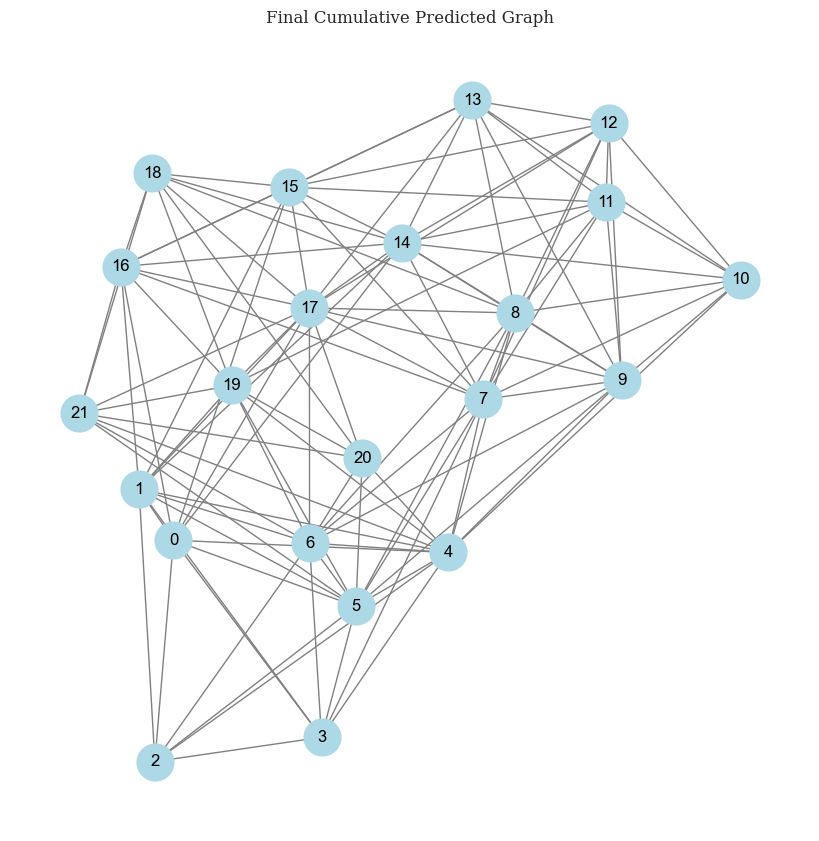

In [43]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

# Define similarity threshold
threshold = 0.995  # Adjust as needed

# Create a final cumulative graph
final_G = nx.Graph()

# Iterate over all samples in train_set
for count, sample in enumerate(train_set):
    print(f"Processing sample {count+1}/{len(train_set)}")

    # Extract node features from the current sample
    node_features = pd.DataFrame(sample[0]).T.values  # Transpose to get nodes as rows
    num_nodes = node_features.shape[1]  # Determine number of nodes

    # Ensure all nodes exist in the final graph
    final_G.add_nodes_from(range(num_nodes))

    # Compute pairwise cosine similarity
    similarity_matrix = cosine_similarity(node_features)

    # Predict links and add to the final graph
    for i in range(num_nodes):
        for j in range(i + 1, num_nodes):  # Avoid self-loops and duplicates
            if similarity_matrix[i, j] > threshold:
                final_G.add_edge(i, j, weight=similarity_matrix[i, j])

# Print total number of predicted links
print(f"Final Graph: {final_G.number_of_nodes()} nodes, {final_G.number_of_edges()} edges")

# Visualize the final cumulative graph
plt.figure(figsize=(8, 8))
pos = nx.spring_layout(final_G)  # Layout for visualization
nx.draw(final_G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=700, font_size=12)
plt.title("Final Cumulative Predicted Graph")
plt.show()


In [203]:
#try_df

In [45]:
adj_G = nx.adjacency_matrix(final_G)  # Sparse matrix
adj_matrix = torch.tensor(adj_G.toarray(), dtype=torch.float32)  # Convert to dense tensor
adj_matrix.shape

torch.Size([22, 22])

In [69]:
from collapsed_shallow_fbscp import ShallowFBCSPNet


import collapsed_shallow_fbscp
import importlib
importlib.reload(collapsed_shallow_fbscp)
# Now you can access the updated class
from collapsed_shallow_fbscp import ShallowFBCSPNet

model = ShallowFBCSPNet(
    n_chans=22,
    n_subjs=9,
    n_outputs=n_classes,
    n_times=input_window_samples,
    #final_conv_length="auto",
    #edge_index = adjacency_matrix
)

# Display torchinfo table describing the model
print(model)

# Send model to GPU
if cuda:
    model.cuda()

# 

ShallowFBCSPNet(
  (temporal): Conv2d(1, 40, kernel_size=(1, 25), stride=(1, 1))
  (spatial): Conv2d(40, 40, kernel_size=(22, 1), stride=(1, 1))
  (pool): AvgPool2d(kernel_size=(1, 100), stride=(1, 100), padding=0)
  (batch_norm): BatchNorm2d(40, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc): LazyLinear(in_features=0, out_features=4, bias=True)
)


In [51]:
import torch
from torch_geometric.nn import GCNConv
from torch_geometric.utils import dense_to_sparse

# Device setup: Check if GPU is available, else use CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Sample adjacency matrix (22 nodes x 22 nodes)
adj_matrix = torch.ones(22, 22)  # fully connected graph (you can modify this)

# Input data: Features for each of the 22 nodes, each with 1101 features
input_tensor = torch.randn(22, 1101)  # 22 nodes, 1101 features per node

# Convert adjacency matrix to edge_index (sparse format)
edge_index, _ = dense_to_sparse(adj_matrix)

# Move everything to the selected device (either CPU or GPU)
input_tensor = input_tensor.to(device)
adj_matrix = adj_matrix.to(device)
edge_index = edge_index.to(device)

# Define GCN layer
gcn = GCNConv(in_channels=1101, out_channels=10).to(device)

# Forward pass
output = gcn(input_tensor, edge_index)

# Print the output shape
print("Output shape:", output.shape)


Output shape: torch.Size([22, 10])


In [ ]:
from tqdm import tqdm
from torch.optim.lr_scheduler import _LRScheduler
from torch.utils.data import DataLoader
import torch
from torch.nn import Module

def train_one_epoch_adj(
        dataloader: DataLoader, model: Module, loss_fn, optimizer,
        scheduler: _LRScheduler, epoch: int, device, adj_matrix, print_batch_stats=True
):
    model.train()  # Set the model to training mode
    train_loss, correct = 0, 0

    progress_bar = tqdm(enumerate(dataloader), total=len(dataloader),
                        disable=not print_batch_stats)

    for batch_idx, (X, y, _) in progress_bar:
        X, y = X.to(device), y.to(device)
        adj_matrix = adj_matrix.to(device)  # Ensure adj_matrix is on the correct device

        optimizer.zero_grad()

        # Forward pass with input tensor X and adjacency matrix adj_matrix
        pred = model(X, adj_matrix)  # Pass both X and adj_matrix

        # If the target y is one-hot encoded, convert it to class indices
        if y.ndimension() == 2:  # If y is one-hot encoded
            y = y.argmax(dim=1)

        print("pred_shape :", pred.shape, y.shape)
        loss = loss_fn(pred, y)
        loss.backward()
        optimizer.step()  # Update the model weights

        train_loss += loss.item()
        correct += (pred.argmax(1) == y).sum().item()

        if print_batch_stats:
            progress_bar.set_description(
                f"Epoch {epoch}/{n_epochs}, "
                f"Batch {batch_idx + 1}/{len(dataloader)}, "
                f"Loss: {loss.item():.6f}"
            )

    # Update the learning rate
    scheduler.step()

    correct /= len(dataloader.dataset)
    return train_loss / len(dataloader), correct


In [ ]:
@torch.no_grad()
def test_model_adj(dataloader: DataLoader, model: torch.nn.Module, loss_fn, adj_matrix, print_batch_stats=True):
    device = next(model.parameters()).device  # Get model device
    size = len(dataloader.dataset)
    n_batches = len(dataloader)
    model.eval()  # Switch to evaluation mode
    test_loss, correct = 0, 0

    # Initialize dictionaries for per-class tracking
    class_correct = defaultdict(int)
    class_total = defaultdict(int)

    # Lists to store true and predicted labels for confusion matrix
    all_preds = []
    all_targets = []

    if print_batch_stats:
        progress_bar = tqdm(enumerate(dataloader), total=len(dataloader))
    else:
        progress_bar = enumerate(dataloader)

    for batch_idx, (X, y, _) in progress_bar:
        X, y = X.to(device), y.to(device)
        
        # Ensure adj_matrix is on the same device as X
        adj_matrix = adj_matrix.to(device)

        # Forward pass with input tensor X and adjacency matrix adj_matrix
        pred = model(X, adj_matrix)
        
        batch_loss = loss_fn(pred, y).item()

        test_loss += batch_loss
        correct += (pred.argmax(1) == y).sum().item()

        # Store predictions and true labels for confusion matrix
        all_preds.append(pred.argmax(1).cpu())
        all_targets.append(y.cpu())

        # Compute per-class accuracy
        preds_labels = pred.argmax(1)
        for label, pred_label in zip(y, preds_labels):
            class_total[label.item()] += 1
            class_correct[label.item()] += (label == pred_label).item()

        if print_batch_stats:
            progress_bar.set_description(
                f"Batch {batch_idx + 1}/{len(dataloader)}, Loss: {batch_loss:.6f}"
            )

    # Convert lists to tensors
    all_preds = torch.cat(all_preds)
    all_targets = torch.cat(all_targets)

    # Compute per-class accuracy
    class_accuracies = {
        cls: (class_correct[cls] / class_total[cls]) * 100 if class_total[cls] > 0 else 0
        for cls in class_total
    }

    # Compute overall accuracy
    test_loss /= n_batches
    overall_accuracy = (correct / size) * 100

    # Print per-class accuracy
    print("\nClass-wise Accuracy:")
    for cls, acc in class_accuracies.items():
        print(f"  Class {cls}: {acc:.2f}%")

    print(f"Test Accuracy: {overall_accuracy:.1f}%, Test Loss: {test_loss:.6f}\n")

    return test_loss, overall_accuracy, class_accuracies, all_preds, all_targets


In [93]:
import torch
import networkx as nx
import Spatial_Zero_Start_Adj
import importlib
import pandas as pd
#import os
#os.environ["CUDA_LAUNCH_BLOCKING"] = "1"
# Reload module in case it has been updated
importlib.reload(Spatial_Zero_Start_Adj)
from Spatial_Zero_Start_Adj import ShallowGraphConv

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# Initialize the model
model_2 = ShallowGraphConv(
    n_chans=n_chans,
    n_outputs=n_classes,
    n_times=input_tensor.shape[-1],  # Use correct time dimension
    n_subjs=9,
).to(device)
# Generate adjacency matrix for the graph 'final_G'
adj_G = nx.adjacency_matrix(final_G)
adj_matrix = torch.tensor(adj_G.toarray(), dtype=torch.float32)  # Convert sparse matrix to dense tensor

# Set model parameters
n_chans = 22  # Number of EEG channels (nodes)
n_classes = 4  # Number of classification outputs

# Extract one sample from train_set
#for count, sample in enumerate(train_set):
#    node_features = pd.DataFrame(sample[0]).T.values  # (1125, 22)
    #print("Original feature shape:", node_features.shape)  # Debugging
     # Take only the first sample for now

    # Convert to PyTorch tensor and reshape to match the expected input format
#    input_tensor = torch.tensor(node_features, dtype=torch.float32).T.unsqueeze(0)  # (1, 22, 1125)
    #print("Input tensor shape:", input_tensor.shape)  # Should be (batch_size=1, n_chans=22, n_times=1125)

    # Check if CUDA is available and move everything to GPU
#    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#    model_2.to(device)
#    adj_matrix = adj_matrix.to(device)
#    input_tensor = input_tensor.to(device)

    # Forward pass
#    output = model_2(input_tensor, adj_matrix)

    # Print the output shape
    #print("Output shape:", output.shape)  # Expected: [1, n_classes]


In [20]:
import wandb
wandb.login()

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: philipwinstroemjespersen (philinthesky). Use `wandb login --relogin` to force relogin


True

In [98]:
import torch
import wandb
from torch.utils.data import DataLoader
from torch.optim import AdamW
from torch.optim.lr_scheduler import CosineAnnealingLR
from torch.nn import CrossEntropyLoss
import numpy as np

# Initialize Weights & Biases
wandb.init(project="Master Thesis", name="ShallowConvDilation3 Accuracy")

# Define hyperparameters
lr = 0.001
weight_decay = 1e-4
batch_size = 124  # Start with 124
n_epochs = 10

# Log hyperparameters to wandb
wandb.config.update({
    "learning_rate": lr,
    "weight_decay": weight_decay,
    "batch_size": batch_size,
    "epochs": n_epochs
})

# Define optimizer and scheduler
optimizer = AdamW(model_2.parameters(), lr=lr, weight_decay=weight_decay)
scheduler = CosineAnnealingLR(optimizer, T_max=n_epochs - 1)

# Define loss function
loss_fn = CrossEntropyLoss()

# Create DataLoaders
train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_set, batch_size=batch_size)

# Initialize lists to store all predictions & targets
all_preds, all_targets = [], []

# Training loop
for epoch in range(1, n_epochs + 1):
    print(f"Epoch {epoch}/{n_epochs}: ", end="")

    train_loss, train_accuracy = train_one_epoch_adj(
        train_loader, model_2, loss_fn, optimizer, scheduler, epoch, device, adj_matrix
    )

    test_loss, test_accuracy, class_accuracies, batch_preds, batch_targets = test_model_adj(test_loader, model_2, loss_fn,adj_matrix)

    # Store predictions & labels for confusion matrix
    all_preds.extend(batch_preds)
    all_targets.extend(batch_targets)

    # Print class-wise accuracy
    print("\nClass-wise Accuracy:")
    for class_idx, acc in class_accuracies.items():
        print(f"  Class {class_idx}: {acc:.2f}%")

    # Log results to wandb
    wandb.log({
        "epoch": epoch,
        "train_loss": train_loss,
        "train_accuracy": train_accuracy * 100,
        "test_loss": test_loss,
        "test_accuracy": test_accuracy,
        "learning_rate": scheduler.get_last_lr()[0],
        **{f"class_{class_idx}_accuracy": acc for class_idx, acc in class_accuracies.items()}
    })

    print(
        f"Train Accuracy: {100 * train_accuracy:.2f}%, "
        f"Average Train Loss: {train_loss:.6f}, "
        f"Test Accuracy: {test_accuracy:.2f}%, "
        f"Average Test Loss: {test_loss:.6f}\n"
    )

# Convert lists to NumPy arrays
all_preds = np.array(all_preds)
all_targets = np.array(all_targets)

# Save predictions & true labels for later use (confusion matrix)
wandb.log({"all_preds": all_preds.tolist(), "all_targets": all_targets.tolist()})

wandb.finish()


Epoch 1/10: 

  0%|          | 0/21 [00:00<?, ?it/s]

x-pool:  torch.Size([124, 124, 22, 5])
x-squeeze:  torch.Size([124, 124, 22, 5])
After squeeeze:  torch.Size([124, 22, 5])
tensor([[[[ 1.0564e-02,  3.8822e-03, -4.5698e-02,  3.6179e-02,  1.3663e-02],
          [ 1.7131e-02,  7.3446e-03, -3.5721e-02,  4.4084e-02,  1.0458e-02],
          [ 2.2180e-02, -5.0479e-03, -3.9733e-02,  3.9891e-02,  2.3512e-02],
          ...,
          [ 1.7781e-02, -1.7689e-03, -1.9959e-02,  1.0695e-02,  2.3156e-02],
          [ 1.7327e-02, -4.0345e-03, -1.8538e-02,  1.0178e-02,  1.7788e-02],
          [ 2.4605e-02, -1.1154e-02, -1.6788e-02,  1.3418e-02,  8.5546e-03]],

         [[-1.6027e-02,  1.4944e-02,  6.6487e-02, -5.3282e-02, -1.9537e-02],
          [-2.5856e-02,  3.2571e-02,  4.1246e-02, -5.0956e-02, -1.8732e-02],
          [-3.0342e-02,  3.9558e-02,  5.1712e-02, -5.4807e-02, -3.0149e-02],
          ...,
          [-1.5407e-02,  3.2309e-02,  3.0364e-02, -2.4638e-02, -2.5940e-02],
          [-1.5283e-02,  3.2160e-02,  3.1830e-02, -2.8194e-02, -2.0518e-02]

  0%|          | 0/21 [00:00<?, ?it/s]


RuntimeError: Expected target size [124, 4], got [124]

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Load predictions and true labels (ensure these are NumPy arrays)
all_preds = np.array(wandb.run.history(keys=["all_preds"])).flatten()
all_targets = np.array(wandb.run.history(keys=["all_targets"])).flatten()

# Compute confusion matrix
cm = confusion_matrix(all_targets, all_preds)

# Define class labels (modify if needed)
class_labels = [f"Class {i}" for i in range(cm.shape[0])]

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()



SyntaxError: invalid syntax (1409031192.py, line 23)

In [ ]:
# Assuming 'model' is your trained Braindecode model
torch.save(model, "braindecode_model_temponly.pth")
torch.save(model.state_dict(), "braindecode_model_temponly_state.pth")
